In [2]:
import os
import pandas as pd
from dotenv import load_dotenv
from transformers import BertTokenizer

In [3]:
load_dotenv()
data_dir = os.getenv("DATA_DIR")
raw_data_path = os.path.join(data_dir, "raw", "anime_data.csv")
raw_data = pd.read_csv(raw_data_path)

In [4]:
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')
raw_data['tokenized_synopsis'] = raw_data['synopsis'].apply(lambda x: tokenizer(x, truncation=True, max_length=512, return_tensors='pt') if not pd.isna(x) else None)
raw_data['tokenized_synopsis_length'] = raw_data['tokenized_synopsis'].apply(lambda x: x['input_ids'].shape[1] if not pd.isna(x) else 0)

Check to see how many synopses will be truncated by the tokenizer.

count    12266.000000
mean       453.845263
std        383.613021
min          0.000000
25%        104.000000
50%        362.500000
75%        745.000000
max       3635.000000
Name: synopsis_length, dtype: float64

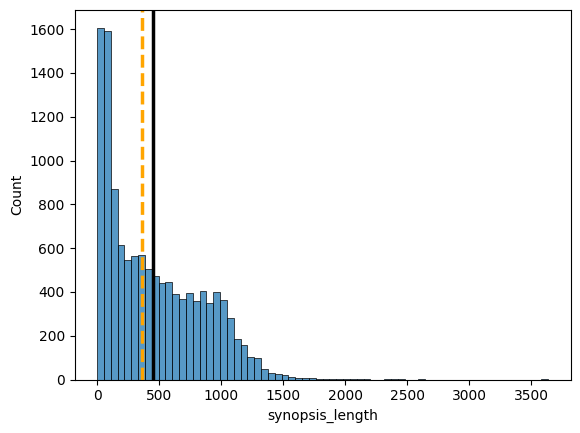

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def safe_length(synopsis):
    if pd.isna(synopsis):
        return 0  # Return 0 for NaN values
    return len(synopsis)

raw_data['synopsis_length'] = raw_data['synopsis'].apply(safe_length)

synopsis_length = raw_data['synopsis_length']
sns.histplot(synopsis_length)
plt.axvline(synopsis_length.mean(), c='k', ls='-', lw=2.5)
plt.axvline(synopsis_length.median(), c='orange', ls='--', lw=2.5)
raw_data['synopsis_length'].describe()

count    12266.000000
mean       103.993722
std         84.336307
min          0.000000
25%         27.000000
50%         85.000000
75%        168.000000
max        512.000000
Name: tokenized_synopsis_length, dtype: float64
Number of synopses of max tokenized length: 8


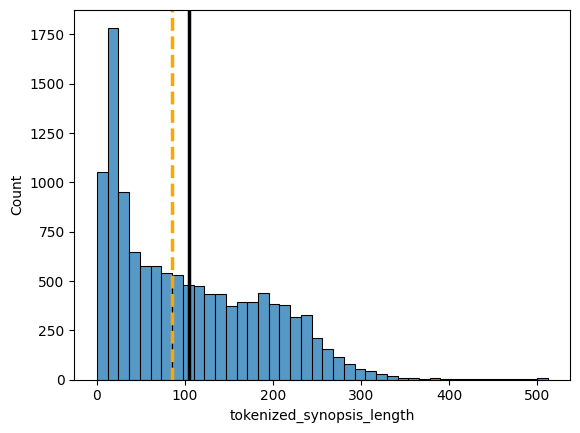

In [6]:
tokenized_length = raw_data['tokenized_synopsis_length']
sns.histplot(tokenized_length)
plt.axvline(tokenized_length.mean(), c='k', ls='-', lw=2.5)
plt.axvline(tokenized_length.median(), c='orange', ls='--', lw=2.5)
print(raw_data['tokenized_synopsis_length'].describe())
print('Number of synopses of max tokenized length:', raw_data[raw_data['tokenized_synopsis_length'] == 512]['id'].count())